## EECS 731 Project 6: D(St)reams of Anomalies

In this project, I will be reading from a dataset of [machine temperature readings](https://github.com/numenta/NAB/blob/master/data/realKnownCause/machine_temperature_system_failure.csv) with the goal of detecting the anomalies in the dataset, which in this case are already known. In particular, I will be detecting the anomalies on two different forms of the dataset's values:

- The original/raw values of the dataset, and
- Min-max normalized values of the dataset.

In addition to the link above, the dataset I used can also be found in the data/raw/ directory.

### Python Imports

For this project, I use the sklearn MinMaxScaler to normalize the original values in the dataset.

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

### Creating the *sklearn* Objects

In this project, I test the following four models:

- Isolation Forest
- DBSCAN
- Local Outlier Factor
- One-Class SVM

In [2]:
minMax = MinMaxScaler()
isoForest = IsolationForest(random_state=0)
localOutlier = LocalOutlierFactor()
dbscan = DBSCAN()
oneClassSVM = OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)

### Reading the Raw Dataset

In [3]:
raw_dataset = pd.read_csv("../data/raw/machine_temperature_system_failure.csv")
raw_dataset

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836
...,...,...
22690,2014-02-19 15:05:00,98.185415
22691,2014-02-19 15:10:00,97.804168
22692,2014-02-19 15:15:00,97.135468
22693,2014-02-19 15:20:00,98.056852


### Extracting the Raw Values

In this case, since the raw value column in 1D, I also reshape the new columns I create to be 2D so that they are compatible with the anomaly detection models I evaluate later.

In [4]:
values_dataset = raw_dataset["value"].values.reshape(-1,1)
values_dataset

array([[73.96732207],
       [74.935882  ],
       [76.12416182],
       ...,
       [97.13546835],
       [98.05685212],
       [96.90386085]])

### Normalizing the Raw Values

In [5]:
values_normalized = minMax.fit_transform(values_dataset)
values_normalized

array([[0.67542444],
       [0.68452524],
       [0.69569057],
       ...,
       [0.89311734],
       [0.90177487],
       [0.89094111]])

Also, in order to plot the model results, I also create a list of the time indexes for the raw values in the original dataset. In this case, since the raw values are equidistantly apart (5 minutes), no changes needed to be made and the index list can be created by simply taking the range of the number of values.

In [6]:
x_range = range(len(values_dataset))

### Creating and Saving the New Dataset

In order to see the raw and normalized values I use, I created a new Pandas dataframe and saved it to the data/processed/ directory. Note that the row indexes of the dataframe align with the time indexes recently created (x_range), hence why I don't include those values in the dataframe. I also, I do reduce the dimensionality of the raw and normalized value columns, but only do so in the context of the dataframe. The columns used for model evaluations remain 2-dimensional.

In [7]:
new_dataset = pd.DataFrame({"Raw Values":values_dataset.squeeze(),"Normalized Values":values_normalized.squeeze()})
new_dataset.to_csv("../data/processed/values_dataset.csv")
new_dataset

,Raw Values,Normalized Values
0,73.967322,0.675424
1,74.935882,0.684525
2,76.124162,0.695691
3,78.140707,0.714638
4,79.329836,0.725812
...,...,...
22690,98.185415,0.902983
22691,97.804168,0.899401
22692,97.135468,0.893117
22693,98.056852,0.901775


### Evaluating on the Raw Values

In evaluating each model on the raw values, I perform the following steps:

- Fit the model to the raw values.
- Predict the anomalies.
- Plot the original dataset values using the model results as color markers.

Once all of the models have been evaluated, I then plot all the results in a 2x2 subplot grid and save the overall plot the visualizations/ directory.

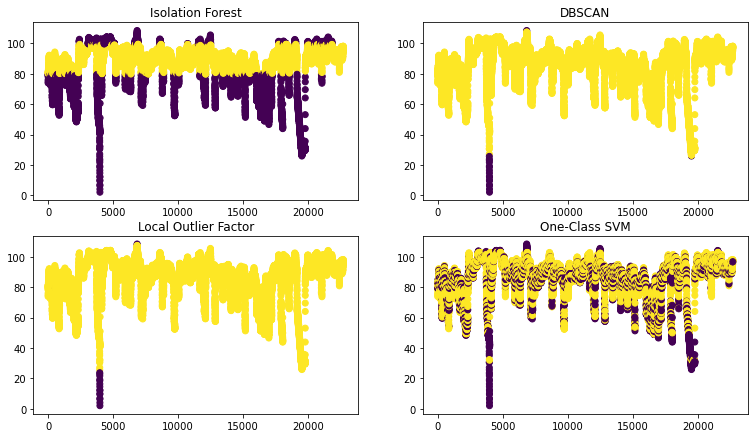

In [8]:
IFresults = isoForest.fit_predict(values_dataset)
DBresults = dbscan.fit_predict(values_dataset)
LOresults = localOutlier.fit_predict(values_dataset)
SVMresults = oneClassSVM.fit_predict(values_dataset)

_,graphs = plt.subplots(2,2)

graphs[0,0].scatter(x_range, raw_dataset["value"], c=IFresults)
graphs[0,0].set_title("Isolation Forest")

graphs[0,1].scatter(x_range, raw_dataset["value"], c=DBresults)
graphs[0,1].set_title("DBSCAN")

graphs[1,0].scatter(x_range, raw_dataset["value"], c=LOresults)
graphs[1,0].set_title("Local Outlier Factor")

graphs[1,1].scatter(x_range, raw_dataset["value"], c=SVMresults)
graphs[1,1].set_title("One-Class SVM")

plt.gcf().set_size_inches((12.80,7.20), forward=False)
plt.savefig("../visualizations/raw_results.png", bbox_inches='tight', dpi=100)

### Evaluating on the Normalized Values

For the normalized values column, I follow the same general steps but fit each model to the normalized values instead.

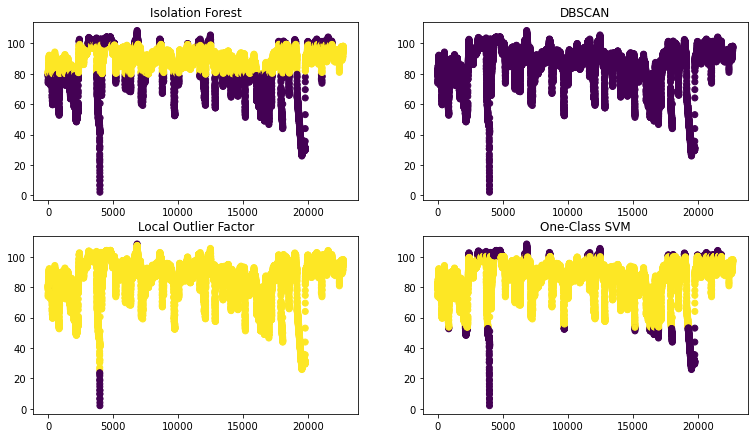

In [9]:
IFresults = isoForest.fit_predict(values_normalized)
DBresults = dbscan.fit_predict(values_normalized)
LOresults = localOutlier.fit_predict(values_normalized)
SVMresults = oneClassSVM.fit_predict(values_normalized)

_,graphs = plt.subplots(2,2)

graphs[0,0].scatter(x_range, raw_dataset["value"], c=IFresults)
graphs[0,0].set_title("Isolation Forest")

graphs[0,1].scatter(x_range, raw_dataset["value"], c=DBresults)
graphs[0,1].set_title("DBSCAN")

graphs[1,0].scatter(x_range, raw_dataset["value"], c=LOresults)
graphs[1,0].set_title("Local Outlier Factor")

graphs[1,1].scatter(x_range, raw_dataset["value"], c=SVMresults)
graphs[1,1].set_title("One-Class SVM")

plt.gcf().set_size_inches((12.80,7.20), forward=False)
plt.savefig("../visualizations/normalized_results.png", bbox_inches='tight', dpi=100)

## Results

As can be seen in the generated plots, each model had noticeably different performance and behaviors among the raw and normalized value columns. Notably, both the Isolation Forest and Local Outlier Factor models had consistent results across both columns whereas the DBSCAN and One-Class SVM models had significantly different results. On a per-model basis, the observed performance was most likely due to the following:

- For the Isolation Forest model, it was unable to detect any of the anomalies and instead clustered the raw and normalized values into two notable clusters. This is probably because the model struggles with higher density datasets, which can be said of the evaluated datasets. As such, it wasn't able to effectively detect the anomalies.
- For the DBSCAN model, it was able to detect the anomalies in the raw values case, but failed to do so in the normalized values case. This is likely because the raw values are farther apart from one another, numerically speaking, so it was able to differentiate the anomalies. On the other hand, since the normalized values are all relatively closer together, the model was unable to separate the anomalies in that instance.
- For the Local Outlier Factor model, it was able to identify the first anomaly in both cases but not the later anomalies. This is likely because the values for the first anomaly deviate further from the average than the other anomalies (i.e. there is more distance between points) so the model is able to detect those. For the other anomalies, since they don't deviate as much, the model isn't able to detect them.
- For the One-Class SVM model, it was able to detect the anomalies in the normalized values case, but had noticeably poor performance in the raw values case (it "detected" anomalies across the entire dataset). This is likely because the radial basis function (rbf) I used it better suited for smaller values, hence why it was able to perform better on the normalized values.

Overall, only the DBSCAN and One-Class SVM models were able to detect the anomalies in the raw and normalized value cases, respectively. While both models do detect false positives for higher temperatures, a simple sanity check can likely be used to rule those detections out. On the other hand, the Isolation Forest and Local Outlier Factor models weren't able to detect *all* of the anomalies in the dataset. As such, for this specific problem the DBSCAN and One-Class SVM models would be better suited and more preferable for detecting anomalies, but the model used is dependent on the values used for detection (i.e. are they unmodified/raw or normalized).